# Machine Learning in Python - Group Project 2


Contributors:
* Thomas Lanning
* Alexander Bohane
* Mengyao Zhang
* Shangyun Sun

## General Setup

In [1]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np
import calendar

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [3]:
# Load data
d = pd.read_csv("hotel.csv")

For the details about data set;

- please check the Project Description pdf file and related article from the Learn page. 

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client).* 

- If you use any additional data sources, you should introduce them here and discuss why they were included.

- Briefly outline the approaches being used and the conclusions that you are able to draw.

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling.* 

- Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. 
- Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data.*

- Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. 
- Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

**All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.**

### 2.1 Exploratory Data Analysis

First we will explore the given dataset and clean the abnormal data.

#### 2.1.1 Data Overview

The information of the given data is shown as follows. 

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We can see that there are 119390 bookings with 30 features. 

Besides, four features `children`, `country`, `agent`, and `company` have 'NULL'. However, the 'NULL' in `agent` and `company` should not be consideres as a missing value. It is more likely to represent 'not applicable'. For example, a booking with 'NULL' `agent` means that this booking is not from a travel agent. So we regard 'NULL' in `agent` and `company` as a new category.

It is worth noting that the data type of `agent` and `company` is float, but actually data recorded in `agent` and `company` are their IDs, which should be regarded as categorical variables.

Then we see the descriptive statistics of our data.

In [5]:
display(d.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2016.16,0.71,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


We can find:
* The ranges of date (including `arrival_date_year`, `arrival_date_week_number` and `arrival_date_day_of_month`) are all reasonable.
* The minimum value of `adr`(Average Daily Rate) is negative (-6.38), which is impossible, so the bookings with negative `adr` should be cleaned from our data. 
* The minimum values of `adults` and `children` are 0. We should make sure that for each booking, the total number of `adults` and `children` is not 0. 

#### 2.1.2 Data Cleaning

Based on what we have found, we clean the data before make further analysis.

We create a new category for 'NULL' in `agent` and `company`.

In [6]:
d['agent'] = d['agent'].fillna(0)
d['company'] = d['company'].fillna(0)

We replace 'Undefined' with 'SC' in `meal` because we can find that they have the same meaning from the table 'Description of Vaviables'. 

In [7]:
d.loc[d['meal'] == 'Undefined', 'meal'] = 'SC'

We replace 'Undefined' in other features with NaN, since they don't have particular meanings and can be treated as missing values.

In [8]:
d.replace('Undefined', np.nan, inplace = True)

Now we want to see how many missing values we have in our data.

In [9]:
null = d.isnull().sum()
null[null.values != 0]

children                  4
country                 488
market_segment            2
distribution_channel      5
dtype: int64

The largest possible proportion of missing values in whole data is 499/119390, which is still pretty small. So we can directly delete those bookings with incomplete data.

In [10]:
d = d.dropna()
len(d)

118897

Then we clean the abnormal data. As we analysed before, negative `adr` should be eliminated.

In [11]:
d = d[d['adr'] >= 0]
len(d)

118896

The length of our data only decreases by 1, which indicates that there is only 1 false `adr` data. 

Then we consider the number of people (adults and children). If a booking has no adult and no child, we believe it is unseasonable and drop it from our data.

In [12]:
d.drop(d[d.adults + d.children == 0].index, inplace = True)
len(d)

118726

The number of bookings is still large. We can then make exploration on it.

Finally, we convert the data type of `agent` and `company` into 'object', in order to easily seperate the numerical and categorical features by their types.

In [13]:
d[['agent', 'company']] = d[['agent', 'company']].astype(int).astype(str)

#### 2.1.3 Numerical Features Analysis

Now we focus on the numerical features. 

In [14]:
num_data = d.select_dtypes(include = ['int', 'float'])
num_data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

The correlation between these features is shown below.

<AxesSubplot:>

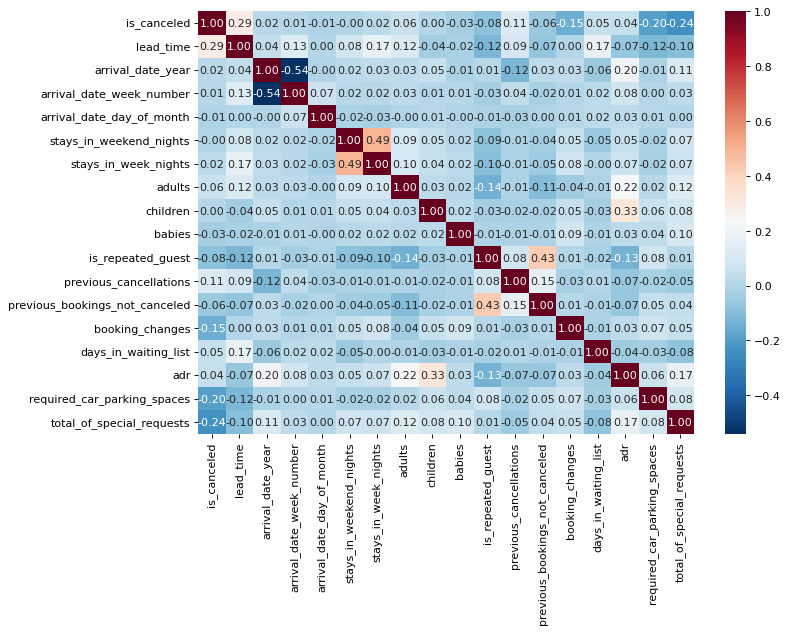

In [15]:
corr = num_data.corr()
sns.set_context({'figure.figsize': [10,7]})
sns.heatmap(corr,cmap = 'RdBu_r', annot = True, fmt = '.2f')

We can find:
* If we focus on the first line, we can see the correlation between `is_canceled` and other features. 
  * `lead_time` has the largest positive correlation (0.29) with `is_canceled`, which means that the earlier a booking is made, the more likely it is to be cancelled. 
  * `total_of_special_requests` has the largest negative correlation (-0.24). It indicates that the more special requests a booking has, the less likely it is to be cancelled.
  * `required_car_parking_spaces` and `booking_changes` have relatively large negative correlations with `is_canceled`. It seems that the bookings with specific requirements (like car parking spaces, further changes and other special requests) reflect the willingness of the customers to go to the hotel, rather than cancel their bookings.
* `arrival_date_year` and `arrival_date_week_number` have the highest correlation among all pairs. However, as the years of our data are too far away from the present, we consider that for the prediction of future cancellation, it is not meaningful to study `arrival_date_year` in the data.
* It is natural that `stay_in_week_nights` and `stay_in_weekend_nights` have relatively high correlation. 
* Customers who have previous bookings that are not cancelled are more likely to book repeatedly.

Since the purpose of the project is to understand why customers cancel their reservations, we then focus on the influence of features which have high correlation with `is_canceled`. For convenience, we define a function to calculate the cancellation rate of different values of one feature.

In [16]:
def cancel_by_group(d, feature_name):
    
    # all values in this feature
    name_list = d[feature_name].drop_duplicates().values
    total = []   # the total number of bookings
    cancel = []  # the number of cancelled bookings
    for name in name_list:
        total.append(len(d[d[feature_name] == name]))
        cancel.append(len(d[(d[feature_name] == name) & (d['is_canceled'] == 1)]))
    cancel_rate = [round(a / b, 2) for a, b in zip(cancel, total)]  # calculate the cancellation rate
    feature_cancel = pd.DataFrame({feature_name: name_list, 'total_booking': total, 
                               'cancellation_rate': cancel_rate})
    sort_value = feature_cancel.sort_values(by = ['total_booking'], ascending = False)
    return sort_value

**lead_time**

<AxesSubplot:xlabel='lead_time', ylabel='cancellation_rate'>

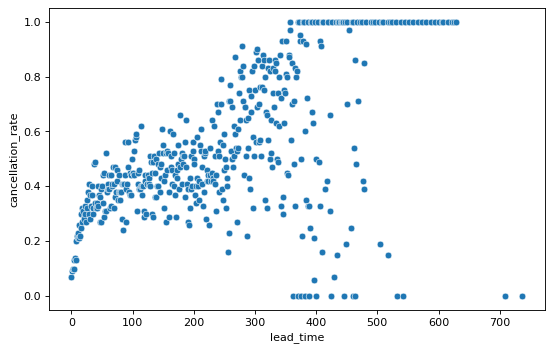

In [17]:
lt_c = cancel_by_group(num_data, 'lead_time').sort_values(by = ['lead_time'])
sns.set_context({'figure.figsize': [8,5]})
sns.scatterplot(x = 'lead_time', y = 'cancellation_rate', data = lt_c)
# label and title

The plot tells:
* When `lead_time` lies within around [0, 100], we can find a clear upward trend, which means that the cancellation rate rises as the number of days booked in advance increases.
* When `lead_time` lies within around [100, 200], there is no clear trend. By observation, we find that the cancellation rate fluctuates between approxiamtely 0.2 and 0.6. And as the value of lead_time exceeds 200, the fluctuation range increases with lead_time increasing.
* When the value of the `lead_time` exceeds 500, most of the cancellation rate is either 0 or 1, perhaps because the total number of bookings is too small, and these results are not generalized.

**total_of_special_requests**

<AxesSubplot:xlabel='total_of_special_requests', ylabel='cancellation_rate'>

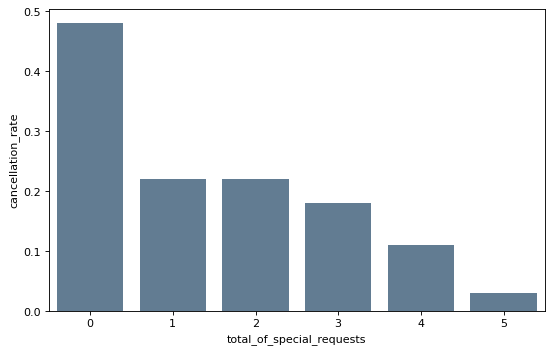

In [18]:
req_c = cancel_by_group(num_data, 'total_of_special_requests').sort_values(by = ['total_of_special_requests'])
sns.barplot(x = 'total_of_special_requests', y = 'cancellation_rate', data = req_c, color = sns.xkcd_rgb['steel blue'])

The plot tells that nearly a half of bookings without special requests will be cancelled later. If a booking has special requests, there will be an obvious drop in cancellation rate. Besides, if a booking has more than 3 special requests, the probability of cancellation will be even lower.

**required_car_parking_spaces**

In [19]:
cancel_by_group(num_data, 'required_car_parking_spaces').sort_values(by = ['required_car_parking_spaces'])

,required_car_parking_spaces,total_booking,cancellation_rate
0,0,111424,0.4
1,1,7269,0.0
2,2,28,0.0
4,3,3,0.0
3,8,2,0.0


It is amazing that the cancellation rate of bookings with requirement on car parking spaces is 0. It is a quite useful feature when we predict whether a booking will be cancelled, but the bookings with such requirement account for only a small percentage. Other features should be explored.

**booking_changes**

From the descriptive statistics of `booking_changes`, we know that it have a quite discrete distribution with several values. We want to select values with enough data (`total_booking` > 100) first, since the results drawn from few data are not general.

In [20]:
bc_c = cancel_by_group(num_data, 'booking_changes').sort_values(by = ['booking_changes'])
bc_c_d = bc_c[bc_c['total_booking'] > 100]
sum(bc_c_d['total_booking'])/sum(bc_c['total_booking'])

0.9988545053316039

The bookings with the specified number of changes account for 99.999% of all bookings. The further analysis based on them is tenable.

<AxesSubplot:xlabel='booking_changes', ylabel='cancellation_rate'>

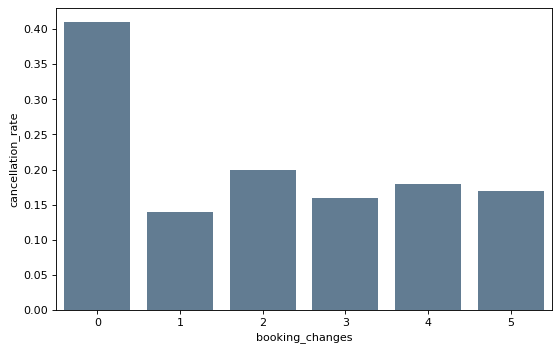

In [21]:
sns.barplot(x = 'booking_changes', y = 'cancellation_rate', data = bc_c_d, color = sns.xkcd_rgb['steel blue'])

There is a large gap in cancellation rate between bookings without any changes (around 40%) and bookings with changes (around 18%). As long as a customer change his booking, he is much less likely to cancel it.

From the analysis of `total_of_special_requests`, `required_car_parking_spaces` and `booking_changes`, we can conclude that if a customer has specific requirements on the booking, including special requests, car parking spaces and any further changes on the current booking, he has the strong willingness of going to the hotel. Therefore, there is a low risk of cancellation for such type of bookings.

#### 2.1.4 Categorical Features

We then focus on categorical features, which is important for feature engineering.

In [22]:
cg_data = d.select_dtypes(include = ['object'])
cg_features = cg_data.columns
cg_data = pd.concat([cg_data, pd.DataFrame({'is_canceled': d['is_canceled']})], axis = 1)

In [23]:
cg_features

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type'],
      dtype='object')

We have 12 categorical features.

**hotel**

...

In [24]:
cancel_by_group(cg_data, 'hotel')

,hotel,total_booking,cancellation_rate
1,City Hotel,79143,0.42
0,Resort Hotel,39583,0.28


total_booking diff

obvious difference in cancellation_rate.

diff in numerical features

In [25]:
data_hotel = d.groupby('hotel').mean()
data_hotel

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,
City Hotel,0.417738,109.877475,2016.174456,27.171992,15.788787,0.794246,2.180673,1.854845,0.091581,0.004953,0.024980,0.079843,0.132368,0.184059,3.232301,105.514645,0.024348,0.547048
Resort Hotel,0.279842,93.449915,2016.123892,27.151732,15.825860,1.196246,3.141121,1.873456,0.129879,0.013971,0.044792,0.101938,0.130056,0.288306,0.527954,95.375476,0.137003,0.621201


1. city with longer lead_time
2. resort stay longer
3. resort children and babies more
4. resort repeated more
5. resort changes, car_parking, and requests more
6. city waiting_list longer, probably because full, waiting for cancellation.

later analysis of categorical features, distinguish type, function

In [26]:
def hotel_cancel(d, feature_name):
    resort = cancel_by_group(d[d['hotel'] == 'Resort Hotel'], feature_name).sort_values(by = [feature_name])
    city = cancel_by_group(d[d['hotel'] == 'City Hotel'], feature_name).sort_values(by = [feature_name])
    hotel_type = ['']
    resort_cancel = pd.DataFrame({feature_name: resort[feature_name], 
                                  'total_booking': resort['total_booking'],
                                  'cancellation_rate': resort['cancellation_rate'],
                                  'hotel_type': 'Resort hotel'})
    city_cancel = pd.DataFrame({feature_name: city[feature_name], 
                                'total_booking': city['total_booking'],
                                'cancellation_rate': city['cancellation_rate'],
                                'hotel_type': 'City hotel'})
    cancel = pd.concat([resort_cancel, city_cancel], ignore_index=True)
    return cancel

**arrival_date_month**

In [27]:
month_num_list = list(range(1, 13))
month_name_list = [calendar.month_name[i] for i in month_num_list]

<AxesSubplot:xlabel='arrival_date_month', ylabel='cancellation_rate'>

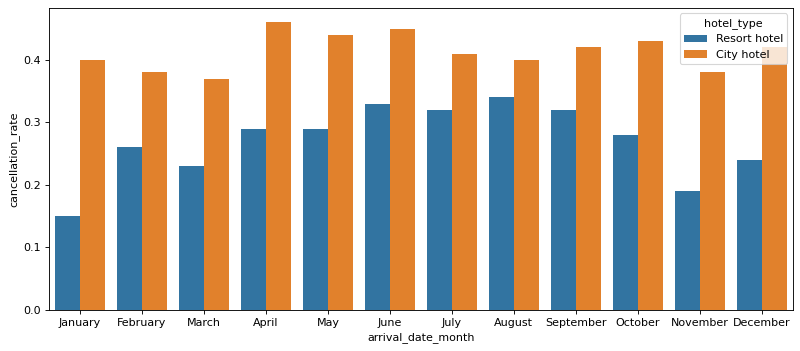

In [28]:
hotel_month = hotel_cancel(cg_data, 'arrival_date_month')
sns.set_context({'figure.figsize': [12,5]})
sns.barplot(x = 'arrival_date_month', y = "cancellation_rate" , hue="hotel_type", data = hotel_month, order = month_name_list)

resort

**meal**

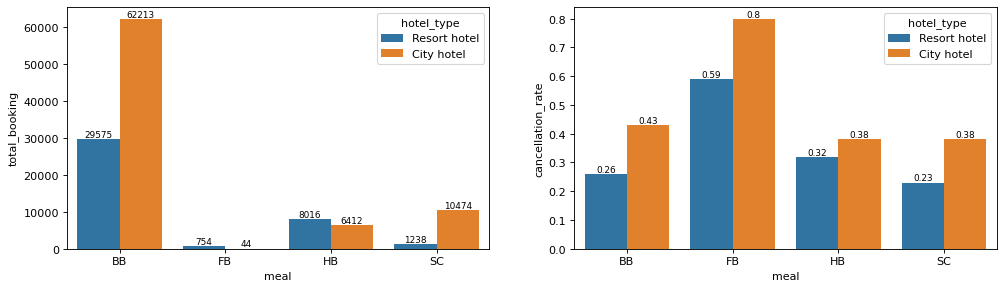

In [29]:
hotel_meal = hotel_cancel(cg_data, 'meal')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'meal', y = 'total_booking' , hue = 'hotel_type', data = hotel_meal)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'meal', y = 'cancellation_rate' , hue='hotel_type', data = hotel_meal)
for i in ax2.containers:
    ax2.bar_label(i, fontsize = 8)

city and resort have similar trend but city overall higher. FB have higher rate, the others are similar.

**country**

In [30]:
country_c = cancel_by_group(cg_data, 'country')
country_c.describe()

,total_booking,cancellation_rate
count,177.000000,177.000000
mean,670.768362,0.302881
std,3922.879385,0.298654
min,1.000000,0.000000
25%,2.000000,0.000000
50%,12.000000,0.250000
75%,74.000000,0.460000
max,48478.000000,1.000000


too many country, filter

not consider hotel type

In [31]:
country_c_d = country_c[country_c['total_booking'] > 1000]
sum(country_c_d['total_booking'])/sum(country_c['total_booking'])

0.9098765224129508

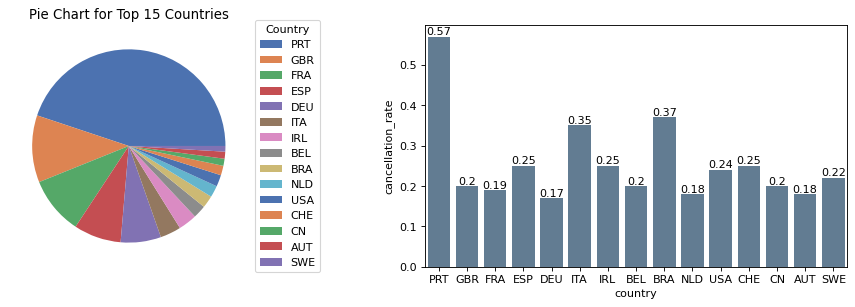

In [32]:
sns.set_context({'figure.figsize': [10,5]})
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
colors = sns.color_palette('deep')
wedges, text = plt.pie(country_c_d['total_booking'], colors = colors)
plt.legend(wedges, country_c_d['country'], title = 'Country', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Pie Chart for Top 15 Countries')
fig.add_subplot(1, 2, 2)
ax = sns.barplot(x = 'country', y = 'cancellation_rate', data = country_c_d, color = sns.xkcd_rgb['steel blue'])
for i in ax.containers:
    ax.bar_label(i)

PRT; ITA and BRA; others; others(0)

**market_segment**

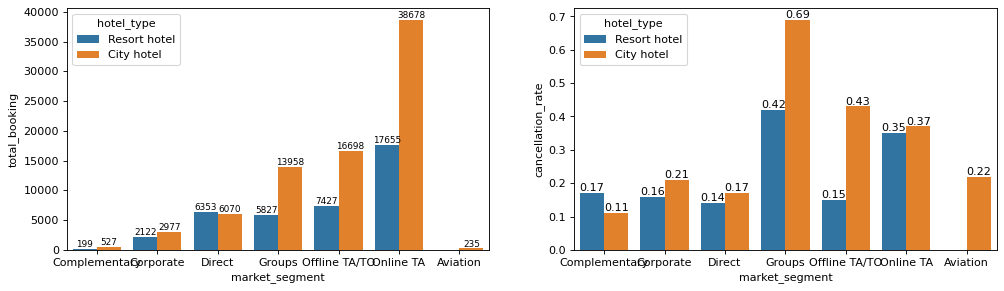

In [33]:
hotel_market = hotel_cancel(cg_data, 'market_segment')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'market_segment', y = 'total_booking' , hue = 'hotel_type', data = hotel_market)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'market_segment', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_market)
for i in ax2.containers:
    ax2.bar_label(i)

1. resort don't have aviation.
2. Offline TA/TO has high rate in city but low in resort.
3. city high in all exclude complementary.

**distribution_channel**

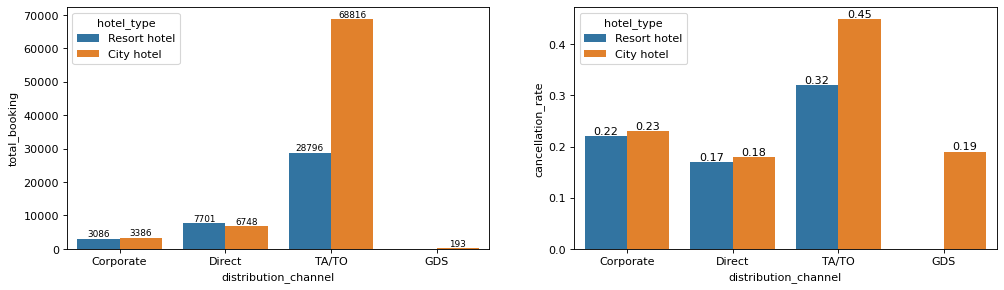

In [34]:
hotel_channel = hotel_cancel(cg_data, 'distribution_channel')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'distribution_channel', y = 'total_booking' , hue = 'hotel_type', data = hotel_channel)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'distribution_channel', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_channel)
for i in ax2.containers:
    ax2.bar_label(i)

1. resort don't have GDS
2. TA/TO much higher than others.

**room_type**

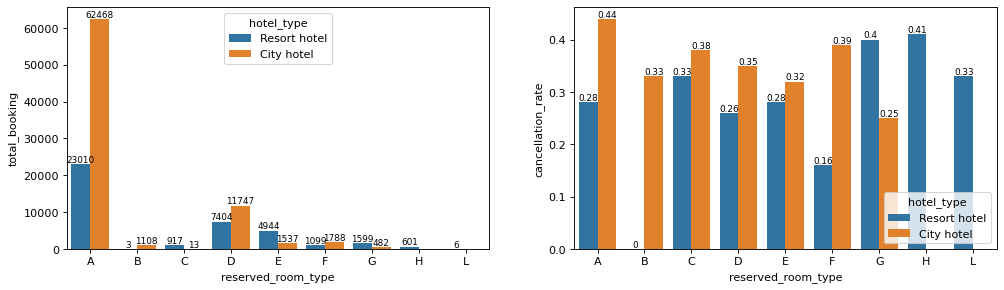

In [35]:
hotel_rm = hotel_cancel(cg_data, 'reserved_room_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'reserved_room_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_rm)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'reserved_room_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_rm)
ax2.legend(loc = 'lower right', title = 'hotel_type')
for i in ax2.containers:
    ax2.bar_label(i, fontsize = 8)

1. city don't have H and L, resort B very few.
2. city A largest and highest, resort H highest but small, A largest too but much lower.
3. city all high exclude G

assigned different room

In [36]:
cg_data['same_room_type'] = cg_data['reserved_room_type'] == cg_data['assigned_room_type']

In [37]:
hotel_cancel(cg_data, 'same_room_type')

,same_room_type,total_booking,cancellation_rate,hotel_type
0,False,7499,0.05,Resort hotel
1,True,32084,0.33,Resort hotel
2,False,7078,0.06,City hotel
3,True,72065,0.45,City hotel


same but cancel, strange. counter-intuitive, probably no influence.

**deposit_type**

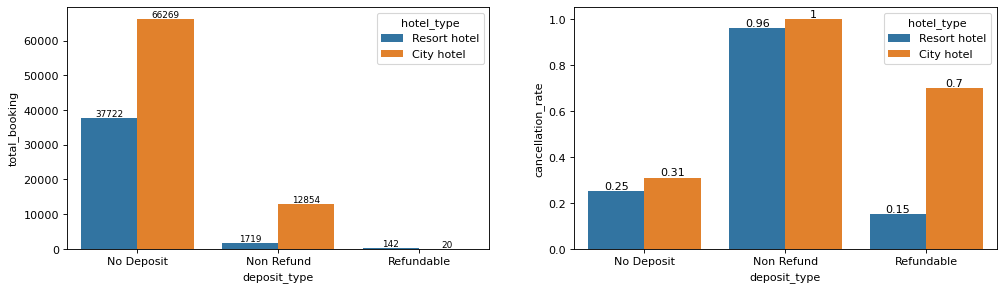

In [38]:
hotel_deposit = hotel_cancel(cg_data, 'deposit_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'deposit_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_deposit)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'deposit_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_deposit)
for i in ax2.containers:
    ax2.bar_label(i)

1. strange: non refund highest.
2. refundable city high.

In [39]:
data_deposit = d.groupby('deposit_type').mean()
data_deposit

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
deposit_type,,,,,,,,,,,,,,,,,,
No Deposit,0.284852,89.117529,2016.175159,27.137195,15.817965,0.971074,2.557885,1.867960,0.119001,0.009087,0.035407,0.041850,0.148724,0.247146,1.524901,103.876796,0.070477,0.652316
Non Refund,0.993618,212.928018,2016.032457,27.434639,15.596034,0.622315,2.090235,1.811226,0.000618,0.000000,0.004392,0.411858,0.010636,0.012489,7.999931,89.988000,0.000069,0.001784
Refundable,0.222222,152.098765,2016.141975,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,9.586420,76.209753,0.123457,0.141975


1. lead_time long
2. stay time short
3. children and babies few
4. few repeated
5. high previous_cancellations and low previous_bookings_not_canceled
6. little changes
7. little required_car_parking_spaces and total_of_special_requests

guess: business trip

In [40]:
nonrefund = cg_data[cg_data['deposit_type'] == 'Non Refund']
len(nonrefund)

14573

In [41]:
nonrefund[nonrefund['company'] != '0'].shape

(506, 14)

can't explain. may be excluded from our model.

**agent and company**

large booking,1.general, 2.more cooperation, more concerned.

total_booking decrease

In [42]:
hotel_agent = hotel_cancel(cg_data, 'agent')
hotel_agent.describe()

,total_booking,cancellation_rate
count,409.000000,409.000000
mean,290.283619,0.241809
std,1863.786785,0.312919
min,1.000000,0.000000
25%,2.000000,0.000000
50%,19.000000,0.100000
75%,76.000000,0.390000
max,31915.000000,1.000000


In [43]:
hotel_agent_d = hotel_agent[hotel_agent['total_booking'] > 500]
print('There are', len(hotel_agent_d['agent'].drop_duplicates()), 'agents that have more than 500 bookings in one hotel,')
print('and they take up of', round(sum(hotel_agent_d['total_booking'])/sum(hotel_agent['total_booking'])*100, 2),'%',
      'bookings in all bookings of these two hotels.')

There are 26 agents that have more than 500 bookings in one hotel,
and they take up of 83.2 % bookings in all bookings of these two hotels.


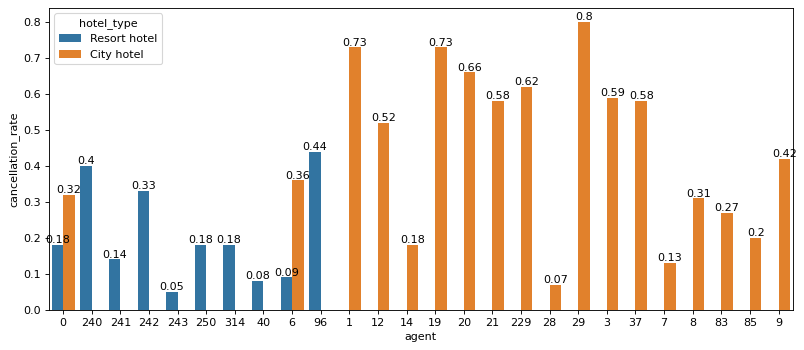

In [44]:
sns.set_context({'figure.figsize': [12,5]})
ax = sns.barplot(x = 'agent', y = 'cancellation_rate' , hue='hotel_type', data = hotel_agent_d)
for i in ax.containers:
    ax.bar_label(i)

1. agent large booking focus on one hotel.
2. city large booking, consistent with before
3. city agent high rate

analysis.

similarly, company

In [45]:
hotel_cancel(cg_data, 'company').sort_values(by = ['total_booking'], ascending = False).head(6)

,company,total_booking,cancellation_rate,hotel_type
233,0,75477,0.43,City hotel
0,0,36645,0.29,Resort hotel
371,40,921,0.08,City hotel
43,223,784,0.15,Resort hotel
422,67,267,0.66,City hotel
397,45,249,0.11,City hotel


most (112122/118726) not company. 40(city) and 223(resort) relatively large and low cancellation.

**customer_type**

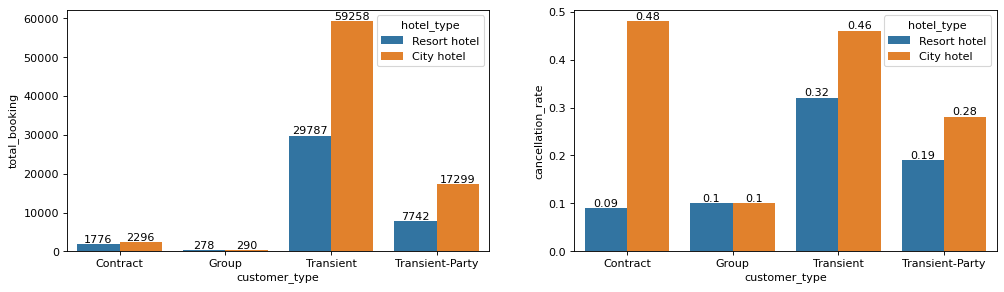

In [46]:
hotel_cus = hotel_cancel(cg_data, 'customer_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'customer_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_cus)
for i in ax1.containers:
    ax1.bar_label(i)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'customer_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_cus)
for i in ax2.containers:
    ax2.bar_label(i)

1. group small
2. contract diff large and high rate of city, but total_booking small
3. Transient higher rate

### 2.2 Feature Engineering

#### 2.2.1 Features Eliminated
* We will eliminate `assigned_room_type`
* We will eliminate `deposit_type`
* We will eliminate `arrival_date_week_number` and `arrival_date_year`

In [47]:
d = d.drop(columns = ['assigned_room_type', 'deposit_type', 'arrival_date_week_number', 'arrival_date_year'])

#### 2.2.2 Features Encoded

`arrrival_date_month`

In [48]:
d.replace(month_name_list, month_num_list, inplace = True)

`country`, `agent`, and `company`

In [49]:
country_list = country_c_d['country'].values

# perform encoding on the country column
encoded = pd.get_dummies(d['country'].apply(lambda x: x if x in country_list else 'Other_country'))

# merge the encoded dataframe with the original dataframe
d = pd.concat([d, encoded], axis = 1)

# drop the original country column and the Other_country since it is indirectly encoded in the other columns
d.drop(['country', 'Other_country'], axis = 1, inplace = True)

In [50]:
agent_list = hotel_agent_d['agent'].drop_duplicates().values
encoded = pd.get_dummies(d['agent'].apply(lambda x: x if x in agent_list else 'Other_agent'))
d = pd.concat([d, encoded], axis = 1)
d.drop(['agent', 'Other_agent'], axis = 1, inplace = True)

In [51]:
company_list = ['0', '40', '223']
encoded = pd.get_dummies(d['company'].apply(lambda x: x if x in company_list else 'Other_company'))
encoded = encoded.rename(columns={'0': '0(company)', '40': '40(company)', '223': '223(company)'})
d = pd.concat([d, encoded], axis = 1)
d.drop(['company', 'Other_company'], axis = 1, inplace = True)

In [52]:
d.iloc[0:1, -40:]

,CN,DEU,ESP,FRA,GBR,IRL,ITA,NLD,PRT,SWE,...,6,7,8,83,85,9,96,0(company),223(company),40(company)
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


12 categorical features, after deleting 2 and encoding the above 4, remain 6. They all have limited (less than 10) catogories, direct OneHotEncode.

In [53]:
onehot_feature = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']
onehot_column = []
for feature in onehot_feature:
    onehot_column.append(d.columns.get_loc(feature))
all_column = list(range(0, d.shape[1]))
others_column = list(set(all_column) - set(onehot_column))

In [54]:
ONE = OneHotEncoder(drop = 'first')

encoder = ColumnTransformer([
    ('others', 'passthrough', others_column),
    ('onehot', ONE, onehot_column),
])

In [55]:
d = encoder.fit_transform(d)
column_names = encoder.get_feature_names_out()

In [56]:
for i in range(len(column_names)):
    column_names[i] = column_names[i][8:]

In [57]:
d = pd.DataFrame(d, columns = column_names)
d.shape

(118726, 85)

In [58]:
#d.to_csv('final_data.csv')

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model.*

- You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, classification trees, SVC, etc.) but you should not include a detailed narrative of all of these attempts. 
- At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.

*For example if you considered a logistic regression model, a classification tree, and a SVC model and ultimately settled on the logistic regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the logistic regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

**This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.**

In [59]:
filneame = './final_data.csv'

## 4. Discussion & Conclusions


*In this section you should provide a general overview of **your final model**, its **performance**, and **reliability**.* 

Your report must include the following:

* Some discussion of the features that are most important for predicting a cancelation - we do not need discussion of specific coefficient values but direction of the effect should be clear (e.g. the earlier a booking is made the more likely it is to be canceled).

* A validated assessment of your model's performance, but this must be specifically discussed in the context of bookings and running a hotel. 

* It is not sufficient to report summary statistics like the accuracy or AUC - you must address the perfomance in terms of potential gains and losses for the hotel (e.g. think about what happens if your model predicts a cancelation that does not actually occur and a room ends up being double booked or vice versa). 

* Explain why you think your particular model would or would not be economically viable.

## 5. References

*In this section, you should present a list of external sources (except the course materials) that you used during the project, if any*

- Additional data sources can be cited here, in addition to related python documentations, any other webpage sources that you benefited from